# Non adaptive tapping paradigm: isochronous tapping and beat syncrhonization to music

**Authors:   Manuel Anglada-Tort, Peter Harrison, Nori Jacoby**

This demo shows how to apply _REPP_ in non adaptive tapping experiemnts. We include two examples: (a) tapping to an isochronys stimulus (creating the audio stimulus on the fly) and (b) beat syncrhonization to music (loading the files from the input dir)


In [1]:
# Before starting, set the right working dir and imports
import os
if 'path_to_dir' not in globals():
    path_to_dir = os.path.split(os.getcwd())[0]
os.chdir(path_to_dir)

# working directories for input and output files
input_dir = "input"
output_dir = "output"

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import platform
if platform.system() == "Linux":
    pass
else:
    matplotlib.use('agg')
%matplotlib inline

# Import global parameters defined in config.py
from repp.config import sms_tapping


## Choose the tapping task
Choose one of the two tapping tasks:

    1. Beat syncrhonization task: IS_MUSIC = True
    2. Isocrhonus tapping: IS_MUSIC = False

In [2]:
IS_MUSIC = True

## 1 Stimulus preparation
We can now start with the first step: preparing the audio stimulus to be used with _REPP_

stim_onsets = 
[1281.0, 1741.0, 2193.0, 2665.0, 3122.0, 3618.0, 4083.0, 4553.0, 5018.0, 5493.0, 5955.0, 6407.0, 6883.0, 7340.0, 7792.0, 8272.0, 8712.0, 9206.0, 9668.0, 10131.0, 10591.0, 11071.0, 11529.0, 12013.0, 12441.0, 12918.0, 13370.0, 13828.0, 14307.0, 14776.0, 15226.0, 15699.0, 16174.0, 16627.0, 17087.0, 17559.0, 18001.0, 18469.0, 18925.0, 19385.0, 19842.0, 20330.0, 20778.0, 21240.0, 21706.0, 22177.0, 22641.0, 23109.0, 23557.0, 24026.0, 24491.0, 24960.0, 25420.0, 25873.0, 26319.0, 26778.0, 27254.0, 27725.0, 28182.0, 28671.0, 29114.0, 29574.0]
onset_is_played = 
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True  True
  True  True]
markers_onsets=
[ 2000.  2280.  2510. 36000. 36

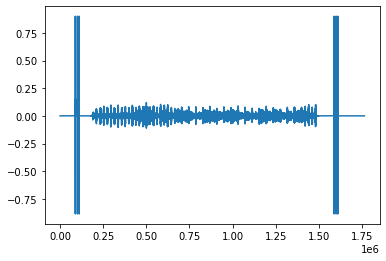

In [3]:
from repp.stimulus import REPPStimulus

if IS_MUSIC:
    stimulus = REPPStimulus("stim_music1", config = sms_tapping)
    stim_prepared, stim_info, filenames = stimulus.prepare_stim_from_files(input_dir)

else:
    stim_ioi = np.repeat(500, 10) # a stimulus defined by a list of ioi
    stimulus = REPPStimulus("iso_500ioi", config = sms_tapping)
    stim_onsets = stimulus.make_onsets_from_ioi(stim_ioi)
    stim_prepared, stim_info, filenames = stimulus.prepare_stim_from_onsets(stim_onsets)

plt.plot(stim_prepared)

# save stimulus info
REPPStimulus.to_json(
    stim_info,
    os.path.join(output_dir,filenames['stim_info_file'])
)

# save audio stimulus
REPPStimulus.to_wav(
    stim_prepared,
    os.path.join(output_dir,filenames['audio_filename']),
    stimulus.config.FS
)

## 2 Recording phase
**Instructions:**

    - Only use the laptop speakers (unplug headphones or wireless devices)
    - Turn on your volume
    - Tap on the surface of your laptop with your index finger (do not tap on any key or trackpad)

In [4]:
import sounddevice as sd

if IS_MUSIC:
    print("****RECORDING PHASE: Please tap in time to the music")
else:
    print("****RECORDING PHASE: Please tap in time to the metronome")

myrecording = sd.playrec(stim_prepared, stimulus.config.FS, channels=1)
sd.wait()  # Wait until recording is finished

# save recording to wav
REPPStimulus.to_wav(
    myrecording,
    os.path.join(output_dir,filenames['recording_filename']),
    stimulus.config.FS
)

****RECORDING PHASE: Please tap in time to the music


## 3 Analysis: signal processing and performance analysis

In [5]:
from repp.analysis import REPPAnalysis

analysis = REPPAnalysis(config = sms_tapping)

output, analysis, is_failed = analysis.do_analysis(
    stim_info,
    os.path.join(output_dir,filenames['recording_filename']),
    filenames['title_plot'],
    os.path.join(output_dir, filenames['plot_filename'])
)

Preparing initial onsets...
Extracting audio signals from mono recording...
reading audio file:
fs=44100 len(samples)=1764000
Extracting raw onsets from  audio signals...
Aligning onsets...
response-stimulus asynchronies = 
[         nan          nan  22.68181818   2.72727273  14.13636364
  -7.31818182 -24.36363636  21.09090909  -4.13636364 -23.
  -8.40909091  14.13636364   0.40909091  34.31818182  -6.54545455
 -22.22727273 -10.18181818 -33.72727273 -13.         -42.36363636
 -36.         -37.36363636 -33.09090909 -20.04545455  20.36363636
  -4.59090909   1.59090909   3.81818182 -12.90909091 -25.77272727
  11.04545455 -24.22727273 -51.27272727 -17.45454545  -7.
 -22.86363636   7.63636364  -6.27272727   4.09090909          nan
          nan          nan          nan          nan          nan
          nan  23.09090909 -29.68181818  -3.13636364  -9.86363636
 -12.59090909 -13.18181818 -10.90909091 -22.09090909   2.36363636
  15.86363636  26.68181818   1.59090909  -3.36363636 -42.36363636


<Figure size 1800x756 with 0 Axes>

(-0.5, 7499.5, 3149.5, -0.5)

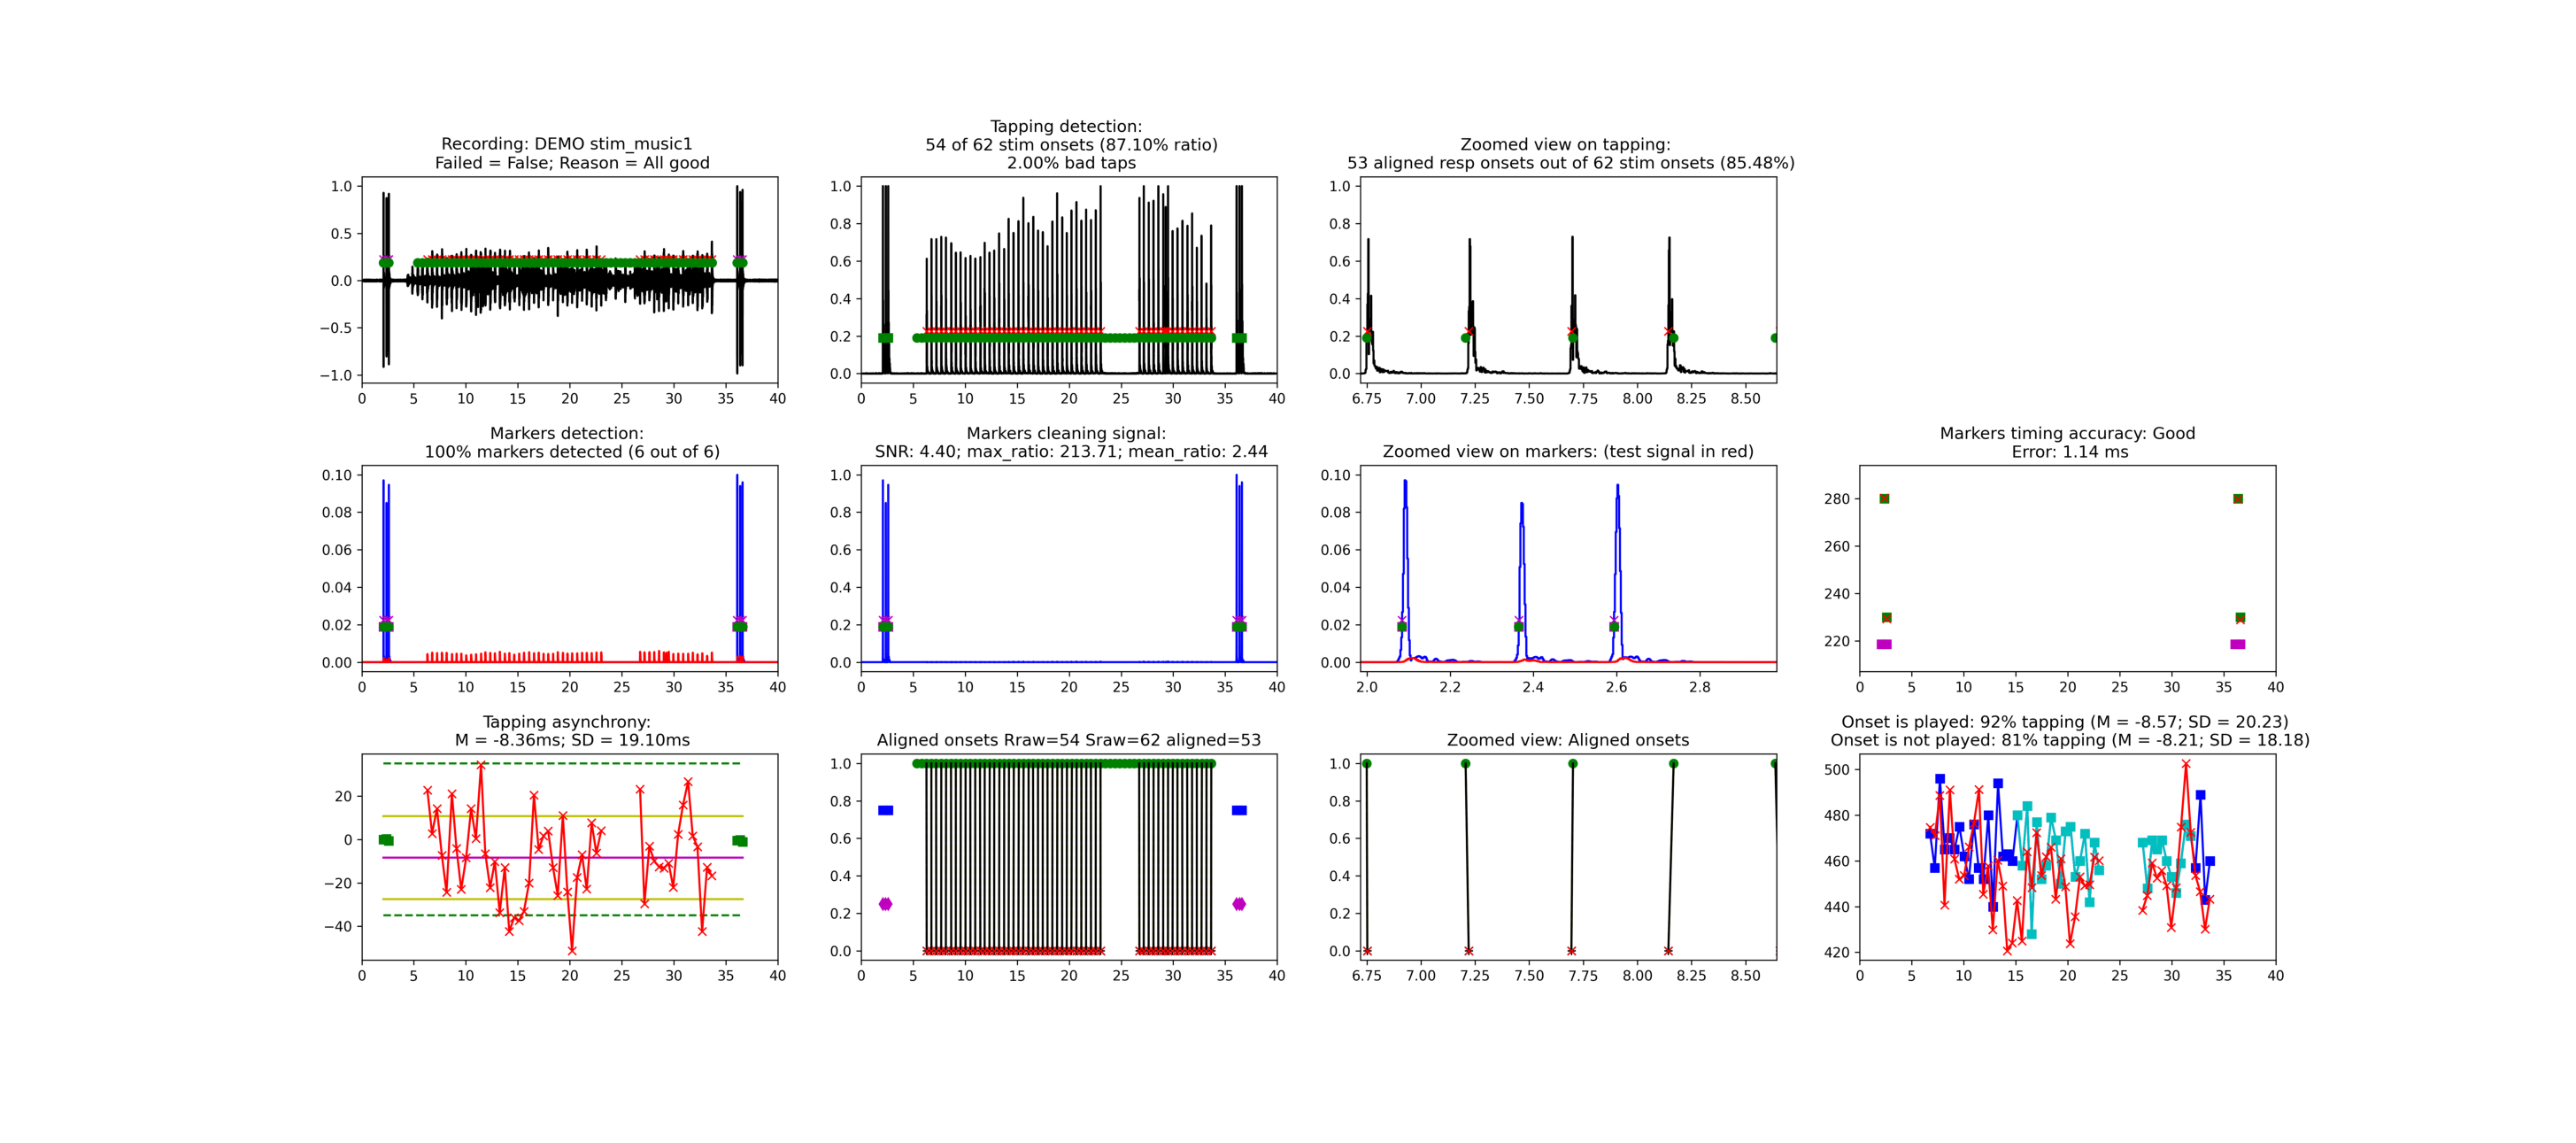

In [6]:
import matplotlib as mpl
import matplotlib.image as mpimg
mpl.rcParams['figure.dpi']= 600
img = mpimg.imread(os.path.join(output_dir, filenames['plot_filename']))
imgplot = plt.imshow(img)
plt.axis('off')